In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_top_movies(year):
    # returns the top 400 movies from website by year as a dataframe
    frames = []
    offsets = [1 , 101, 201, 301]
    for offset in offsets:
        try:
            url = 'https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/released-in-{}/{}'.format(year, offset)
            html_page = requests.get(url)
            frames.append(pd.read_html(html_page.text, index_col=0)[1])
        except IndexError:
            break
        
    return pd.concat(frames)

In [3]:
#testing above function
df = get_top_movies(2020)

# good checkpoint to add lines to see what all df is.... will erase this full block when neating up code
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 1 to 216
Data columns (total 5 columns):
Movie                       216 non-null object
Distributor                 215 non-null object
DomesticBoxOffice           216 non-null object
OpeningWeekendBox Office    202 non-null object
MaxTheaterCount             216 non-null int64
dtypes: int64(1), object(4)
memory usage: 10.1+ KB


,Movie,Distributor,DomesticBoxOffice,OpeningWeekendBox Office,MaxTheaterCount
Rank,,,,,
1,Bad Boys For Life,Sony Pict…,"$204,417,855","$62,504,105",3775
2,Sonic The Hedgehog,Paramount…,"$146,066,470","$58,018,348",4198
3,Birds of Prey (And the Fantabulous Emancipation…,Warner Bros.,"$84,158,461","$33,010,017",4236
4,Dolittle,Universal,"$77,047,065","$21,844,045",4155
5,The Invisible Man,Universal,"$64,914,050","$28,205,665",3636
...,...,...,...,...,...
212,Queen of the Capital,Mutiny Pi…,"$1,269","$1,269",1
213,Une sirÃ¨ne Ã Paris,Sony Pict…,"$1,202","$1,202",10
214,Fear PHarm,Indican P…,"$1,157",$485,1


In [4]:
#will put all this into fuction so its more applical to both money columns and also to clean up the code.
df['OpeningWeekendBox Office'] = df['OpeningWeekendBox Office'].str.replace(',', '')
df['OpeningWeekendBox Office'] = df['OpeningWeekendBox Office'].str.replace('$', '')
df['OpeningWeekendBox Office']

Rank
1      62504105
2      58018348
3      33010017
4      21844045
5      28205665
         ...   
212        1269
213        1202
214         485
215         310
216         478
Name: OpeningWeekendBox Office, Length: 216, dtype: object

In [5]:
#"probably will erase one of these functions..... executive decisions on which is better for plugging into NaN values"
def get_col_mean(col):
    #"drops na to find avg. col is clean pandas str format"
    df1 = col
    df1 = df1.dropna()
    df1 = df1.astype(int)
    
    return str(int(df1.mean()))

def get_col_median(col):
    #"drops na to find avg. col is clean pandas str format"
    df1 = col
    df1 = df1.dropna()
    df1 = df1.astype(int)
    
    return str(int(df1.median()))

In [6]:
#still diciding which value to plug into nans with... will erase half this block

# replaceing nan values with mean in string format
#df['OpeningWeekendBox Office'] = df['OpeningWeekendBox Office'].fillna(get_col_mean(df['OpeningWeekendBox Office']))

# replaceing nan values with median in string format
df['OpeningWeekendBox Office'] = df['OpeningWeekendBox Office'].fillna(get_col_median(df['OpeningWeekendBox Office']))

df['OpeningWeekendBox Office'] = df['OpeningWeekendBox Office'].astype(int)

mean      2.115051e+06
median    2.477300e+04
std       7.613589e+06
Name: OpeningWeekendBox Office, dtype: float64


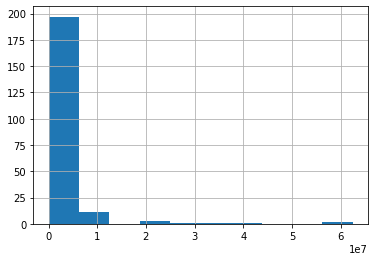

In [7]:
#test two, replacing nan with median
#just playing with data, nothing here meaningful at the moment. (trash code)
print(df['OpeningWeekendBox Office'].apply(['mean', 'median', 'std']))
df['OpeningWeekendBox Office'].hist()

mean      2.115051e+06
median    2.477300e+04
std       7.613589e+06
Name: OpeningWeekendBox Office, dtype: float64


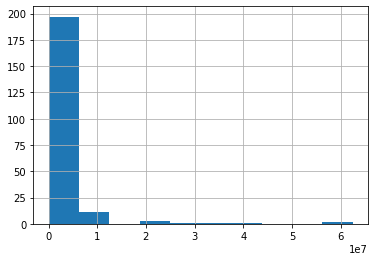

In [8]:
#test one replacing nan with avg
#just playing with data, nothing here meaningful at the moment. (trash code)
#both charts gonna look the same cause i ran this with same data, so it is the exact same thing... 
print(df['OpeningWeekendBox Office'].apply(['mean', 'median', 'std']))
df['OpeningWeekendBox Office'].hist()

In [9]:
df['OpeningWeekendBox Office'].mean()

2115050.787037037

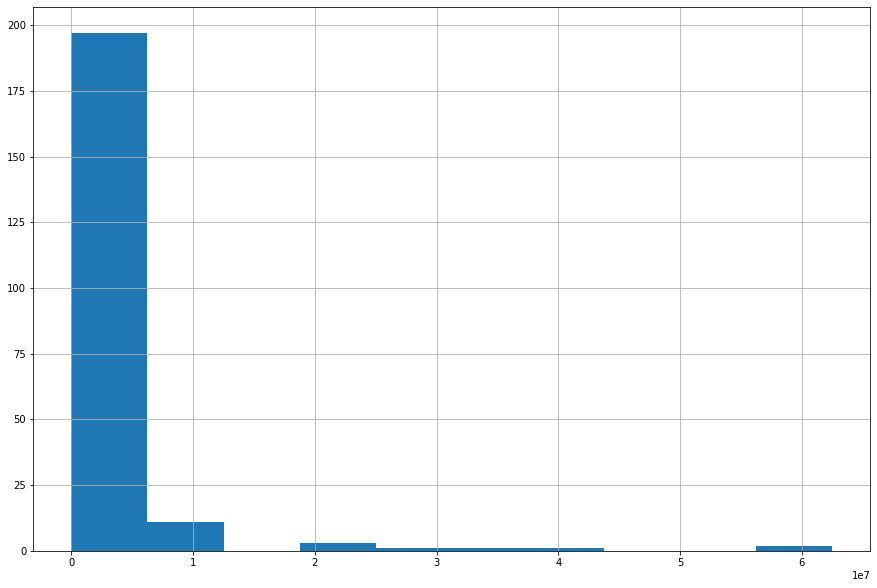

In [10]:
# once again, just playing with code.... just trash currently

# ylim and xlim literally just zooms in on overall chart//// need to break this down /// changing x values should do it

fig = plt.figure(figsize = (15,10))
ax = fig.gca()
df['OpeningWeekendBox Office'].hist(ax = ax)


In [11]:
def get_keys(path):
    #get .json file from local machine
    with open(path) as f:
        return json.load(f)

In [12]:
# need to change to a remote file location. 
keys = get_keys("/Users/Deric/Documents/Flatiron/phase_One/.secret/omdb_api.json")
api_key = keys['api_key']

In [13]:
def get_movie_info(title, year, api_key):
    #plug in title, year, apikey to return the full api of the selected movie.
    #each api request requires the url and the params (at least the title or the movie id)
    api_url = "http://www.omdbapi.com/?apikey={}".format(api_key)
    params = {
            't' : title,
            'type': 'movie',
            'y' : year
            }
    response = requests.get(api_url, params = params).json()
    return response

In [14]:
#this cell is just testing my function above.
title = 'Bad Boys For Life'
year = 2020

get_movie_info(title, year, api_key)

{'Title': 'Bad Boys for Life',
 'Year': '2020',
 'Rated': 'R',
 'Released': '17 Jan 2020',
 'Runtime': '124 min',
 'Genre': 'Action, Comedy, Crime, Thriller',
 'Director': 'Adil El Arbi, Bilall Fallah',
 'Writer': 'Peter Craig (story by), Joe Carnahan (story by), Chris Bremner (screenplay by), Peter Craig (screenplay by), Joe Carnahan (screenplay by), George Gallo (based on characters created by)',
 'Actors': 'Will Smith, Martin Lawrence, Vanessa Hudgens, Alexander Ludwig',
 'Plot': 'Miami detectives Mike Lowrey and Marcus Burnett must face off against a mother-and-son pair of drug lords who wreak vengeful havoc on their city.',
 'Language': 'English, Spanish',
 'Country': 'USA, Mexico',
 'Awards': '1 nomination.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMWU0MGYwZWQtMzcwYS00NWVhLTlkZTAtYWVjOTYwZTBhZTBiXkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '6.6/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '77%'},
  {'Source

=======================================================

1)finish cleaning
2)connecting df to api to add the next couple cols(release month, genre)


I already cleaned up most of my code.... so please feel free to interject print statements all over to verify and fully understand each bit of code.

